In [1]:
import pandas as pd
import numpy as np
import seaborn as snc
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn import datasets,linear_model

# Importing and Exploration of datasets


In [2]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\chocolate.csv")

In [3]:
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [4]:
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [5]:
data.shape


(1500, 9)

In [6]:
data.describe()

,REF,Review\nDate,Rating
count,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,3.183167
std,554.693828,2.933734,0.484319
min,5.000000,2006.000000,1.000000
25%,572.000000,2010.000000,2.750000
50%,1071.000000,2013.000000,3.250000
75%,1503.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [7]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1500 non-null   object 
 1   Specific Bean Origin
or Bar Name  1500 non-null   object 
 2   REF                               1500 non-null   int64  
 3   Review
Date                       1500 non-null   int64  
 4   Cocoa
Percent                     1500 non-null   object 
 5   Company
Location                  1500 non-null   object 
 6   Rating                            1500 non-null   float64
 7   Bean
Type                         1499 non-null   object 
 8   Broad Bean
Origin                 1499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB
None


In [8]:
data.describe(include='all')

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
count,1500,1500,1500.000000,1500.000000,1500,1500,1500.000000,1499,1499
unique,391,893,NaN,NaN,45,57,NaN,36,93
top,Soma,Madagascar,NaN,NaN,70%,U.S.A.,NaN,,Venezuela
freq,39,42,NaN,NaN,568,632,NaN,750,174
mean,NaN,NaN,1036.881333,2012.326000,NaN,NaN,3.183167,NaN,NaN
std,NaN,NaN,554.693828,2.933734,NaN,NaN,0.484319,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,572.000000,2010.000000,NaN,NaN,2.750000,NaN,NaN
50%,NaN,NaN,1071.000000,2013.000000,NaN,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1503.000000,2015.000000,NaN,NaN,3.500000,NaN,NaN


In [9]:
data.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

# Cleaning our features name

In [10]:

cols = list(data.columns)


def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))

Feature Names before Cleaning:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company\xa0_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


In [11]:

new_feature_names = rec_features(cols)
new_feature_names[0] = "company"


data=data.rename(columns=dict(zip(data.columns,new_feature_names)))
data

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           1500 non-null   object 
 1   specific_bean_origin_or_bar_name  1500 non-null   object 
 2   ref                               1500 non-null   int64  
 3   review_date                       1500 non-null   int64  
 4   cocoa_percent                     1500 non-null   object 
 5   company_location                  1500 non-null   object 
 6   rating                            1500 non-null   float64
 7   bean_type                         1499 non-null   object 
 8   broad_bean_origin                 1499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


In [13]:
data.columns

Index(['company', 'specific_bean_origin_or_bar_name', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_bean_origin'],
      dtype='object')

In [14]:
data['bean_type'].value_counts()

                            750
Trinitario                  342
Criollo                     128
Forastero                    67
Forastero (Nacional)         46
Blend                        34
Criollo, Trinitario          33
Forastero (Arriba)           32
Trinitario, Criollo           9
Criollo (Porcelana)           8
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Nacional (Arriba)             3
Beniano                       3
Criollo (Ocumare 61)          2
Criollo, Forastero            2
Matina                        2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Amazon mix                    2
Forastero (Arriba) ASSS       1
Criollo (Ocumare 67)          1
Criollo (Wild)                1
CCN51                         1
Nacional                      1
Blend-Forastero,Criollo       1
Trinitario (Amelonado)        1
Criollo (Amarru)              1
Trinitario, TCGA              1
Forastero, Trinitario         1
Trinitar

In [15]:
data['bean_type'].nunique()

36

<AxesSubplot:>

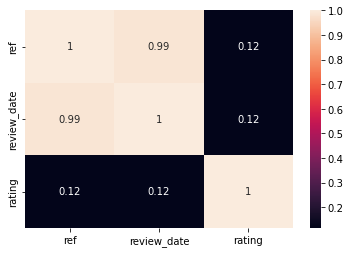

In [16]:
snc.heatmap(data.corr(),annot=True)


In [17]:
print('Unique Values:')
print('company: ',data['company'].nunique())
print('specific_bean_origin_or_bar_name: ', data['specific_bean_origin_or_bar_name'].nunique())
print('Company Location: ',data['company_location'].nunique())
print('bean_type: ', data['bean_type'].nunique())
print('Broad Bean Origin', data['broad_bean_origin'].nunique())
print('Review Date: ', data['review_date'].nunique())
print('Cocoa Percent: ', data['cocoa_percent'].nunique())

Unique Values:
company:  391
specific_bean_origin_or_bar_name:  893
Company Location:  57
bean_type:  36
Broad Bean Origin 93
Review Date:  12
Cocoa Percent:  45


# Conversion of the data types

In [18]:
data.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
bean_type                            object
broad_bean_origin                    object
dtype: object

# Missing values

In [19]:
data.isnull().sum()

company                             0
specific_bean_origin_or_bar_name    0
ref                                 0
review_date                         0
cocoa_percent                       0
company_location                    0
rating                              0
bean_type                           1
broad_bean_origin                   1
dtype: int64

In [20]:
data

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [21]:
data[['bean_type', 'broad_bean_origin']].head()

,bean_type,broad_bean_origin
0,"Criollo, Trinitario",Madagascar
1,Blend,
2,Matina,Costa Rica
3,,Nicaragua
4,CCN51,Colombia


In [22]:
print(data['bean_type'].value_counts().head())
print("Missing Spaces encoded as:")
list(data['bean_type'][0:10])

                        750
Trinitario              342
Criollo                 128
Forastero                67
Forastero (Nacional)     46
Name: bean_type, dtype: int64
Missing Spaces encoded as:


['Criollo, Trinitario',
 'Blend',
 'Matina',
 '\xa0',
 'CCN51',
 'Forastero (Arriba) ASSS',
 'Trinitario',
 '\xa0',
 'Trinitario',
 'Criollo, Trinitario']

In [23]:
def repl_space(x):
    if(x is "\xa0"):
        return "None"

        
data['bean_type'] = data['bean_type'].apply(repl_space)
data.head()

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ASUS\AppData\Local\Temp/ipykernel_4668/1121295252.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(x is "\xa0"):


,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,64%,France,4.00,None,Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,None,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,None,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,None,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,None,Colombia


# Convert Cocoa_percent to numerical values

In [24]:
data['cocoa_percent']=data['cocoa_percent'].str.replace('%','').astype(float)/100
data.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,0.64,France,4.00,None,Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,3.25,None,
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,3.50,None,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,3.50,None,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,3.50,None,Colombia


In [25]:
data['rating'] = (data['rating']* 100).astype(int)
data['rating'].head(5)

0    400
1    325
2    350
3    350
4    350
Name: rating, dtype: int32

In [26]:
data.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                       float64
company_location                     object
rating                                int32
bean_type                            object
broad_bean_origin                    object
dtype: object

<AxesSubplot:xlabel='rating', ylabel='count'>

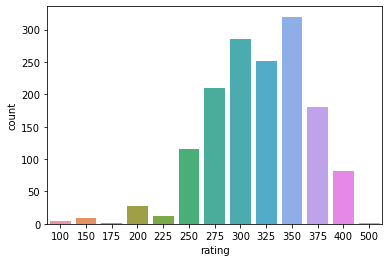

In [27]:
snc.countplot(x = data['rating'])

<AxesSubplot:xlabel='review_date', ylabel='count'>

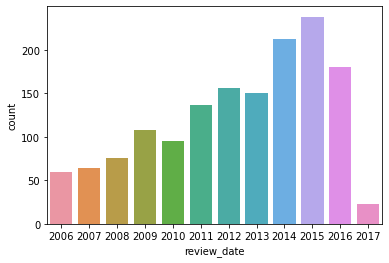

In [28]:
snc.countplot(x = data['review_date'])

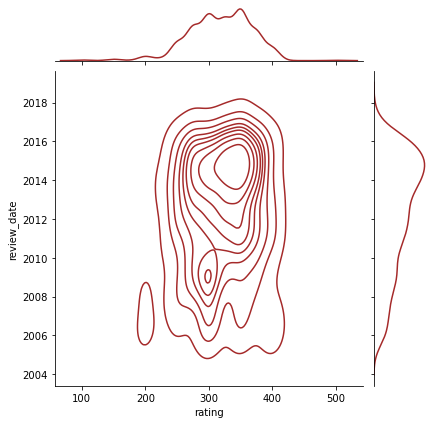

In [29]:
snc.jointplot(x = 'rating', y= 'review_date', data = data, kind='kde', color ='brown')

# Quality of Chocolate change over the years?

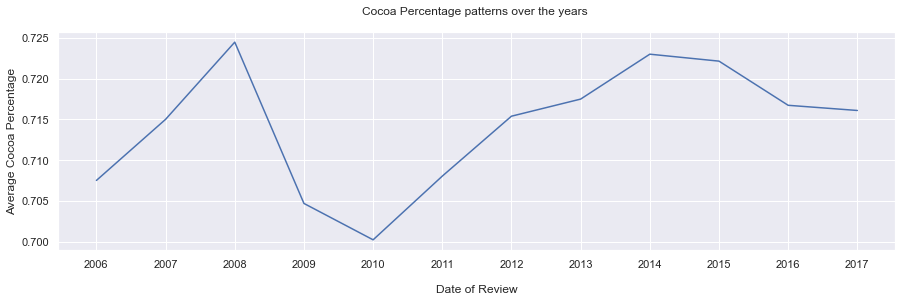

In [30]:

d5 = data.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d5 = d5.reset_index()
snc.set()
plt.figure(figsize=(15, 4))
ax = snc.lineplot(x='review_date', y='cocoa_percent', data=d5)
ax.set(xticks=d5.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

# Average Ratings over the year

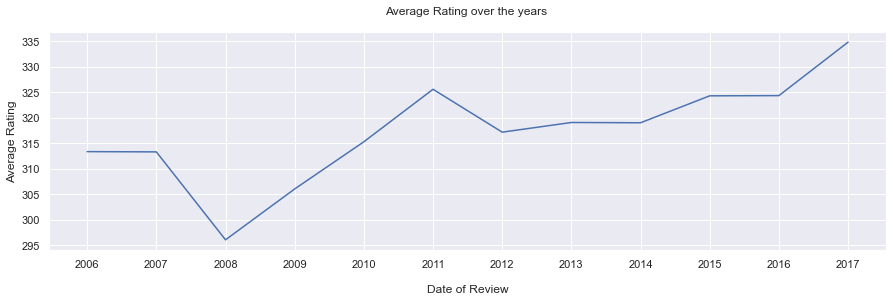

In [31]:
d6 = data.groupby('review_date').aggregate({'rating':'mean'})
d6 = d6.reset_index()
snc.set()
plt.figure(figsize=(15, 4))
ax = snc.lineplot(x='review_date', y='rating', data=d6)
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

# Top 5 Companies in terms of Chocolate Bars

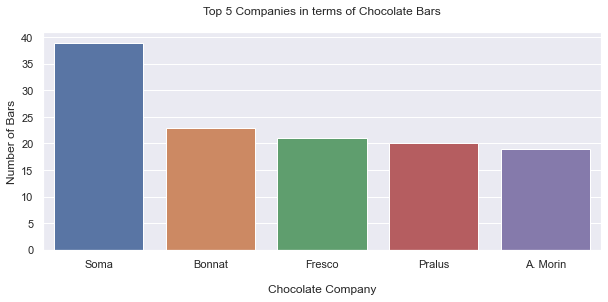

In [32]:
d = data['company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() 


snc.set()
plt.figure(figsize=(10,4))
snc.barplot(x='index', y='company', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

# How many companies have How much entry in this dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


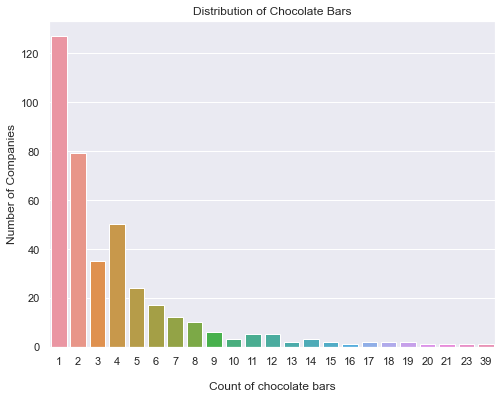

In [33]:
snc.set()
plt.figure(figsize=(8,6))
snc.countplot(data['company'].value_counts().sort_values(ascending=False))
plt.xlabel("\nCount of chocolate bars")
plt.ylabel("Number of Companies")
plt.title("Distribution of Chocolate Bars")
plt.show()

# Top 5 companies in terms of average ratings

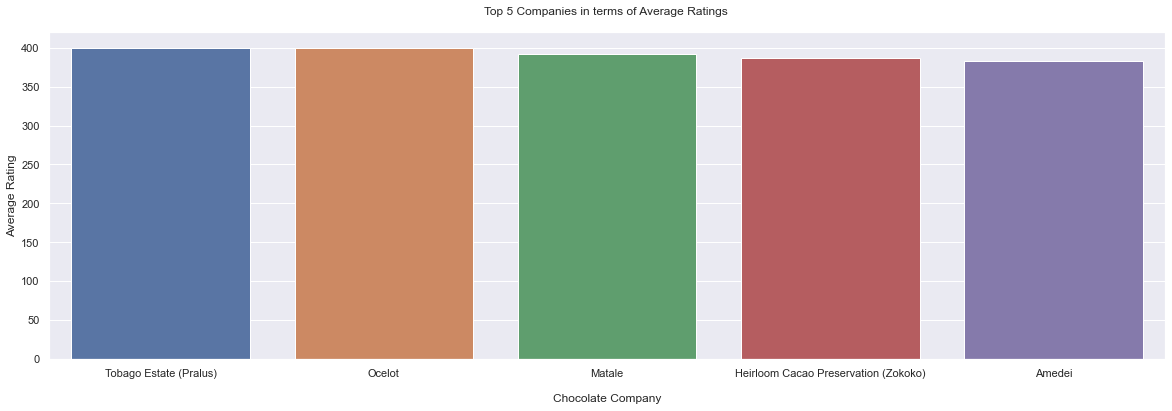

In [34]:
d2 = data.groupby('company').aggregate({'rating':'mean'})
d2 = d2.sort_values('rating', ascending=False).head(5)
d2 = d2.reset_index()


snc.set()
plt.figure(figsize=(20, 6))
snc.barplot(x='company', y='rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

# Top 5 companies in terms of average Cocoa Percentage

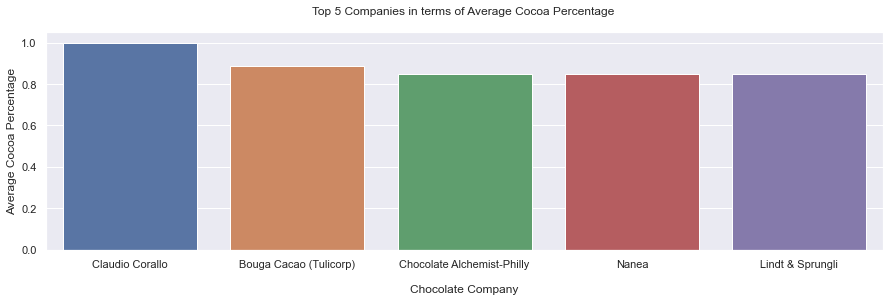

In [35]:
d2 = data.groupby('company').aggregate({'cocoa_percent':'mean'})
d2 = d2.sort_values('cocoa_percent', ascending=False).head(5)
d2 = d2.reset_index()
# Plotting
snc.set()
plt.figure(figsize=(15, 4))
snc.barplot(x='company', y='cocoa_percent', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 5 Companies in terms of Average Cocoa Percentage \n")
plt.show()

# Average rating over the years(top 5 producer Companies)

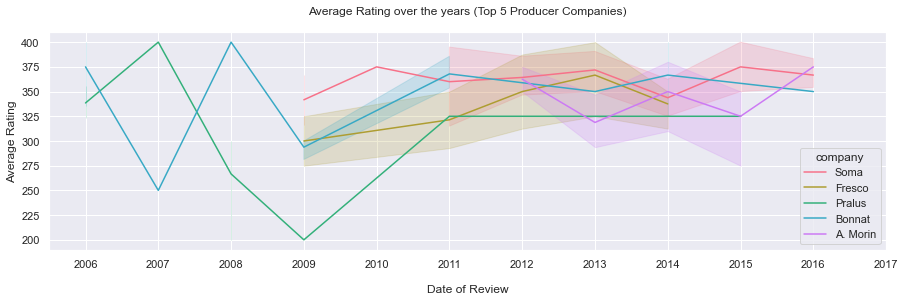

In [36]:
top5_dict = {}
for element in list(d['index']):
    temp = data[data['company']==element]
    top5_dict[element]=temp

top5_list = list(top5_dict.keys())


d7 = data.groupby(['review_date', 'company']).aggregate({'rating':'mean'})
d7 = data.reset_index()
d7 = d7[d7['company'].isin(top5_list)]


snc.set()
plt.figure(figsize=(15, 4))
ax = snc.lineplot(x='review_date', y='rating', hue="company", data=d7, palette="husl")
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years (Top 5 Producer Companies)\n")
plt.show()

# How many Chocolate bars are above or below 'Satisfactory levels' ?

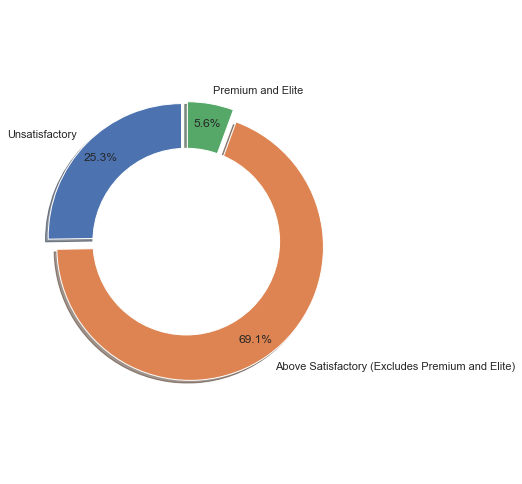

In [37]:
unsatisfactory = data[data['rating'] < 300]
satisfactory = data[(data['rating'] >= 300) & (data.rating < 400)]
pre_elite = data[data['rating'] >= 400]
label_names=['Unsatisfactory','Above Satisfactory (Excludes Premium and Elite)','Premium and Elite']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]
# Now let's make the donut plot
explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [38]:
data.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                       float64
company_location                     object
rating                                int32
bean_type                            object
broad_bean_origin                    object
dtype: object

In [39]:
data

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,0.64,France,400,None,Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,325,None,
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,350,None,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,350,None,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,350,None,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,0.70,U.S.A.,325,None,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,0.58,Austria,350,None,
1497,Guido Castagna,Blend,355,2009,0.64,Italy,325,None,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,0.72,U.K.,350,None,Venezuela


In [40]:
data.tail()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
1495,Dick Taylor,Ecuador,769,2011,0.70,U.S.A.,325,None,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,0.58,Austria,350,None,
1497,Guido Castagna,Blend,355,2009,0.64,Italy,325,None,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,0.72,U.K.,350,None,Venezuela
1499,Hotel Chocolat,"Pepiniere, single Cote",1654,2015,0.70,U.K.,275,None,St. Lucia


In [41]:
data.describe()

,ref,review_date,cocoa_percent,rating
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,0.715640,318.316667
std,554.693828,2.933734,0.062644,48.431878
min,5.000000,2006.000000,0.420000,100.000000
25%,572.000000,2010.000000,0.700000,275.000000
50%,1071.000000,2013.000000,0.700000,325.000000
75%,1503.000000,2015.000000,0.750000,350.000000
max,1952.000000,2017.000000,1.000000,500.000000


In [42]:
data.isnull().sum()

company                               0
specific_bean_origin_or_bar_name      0
ref                                   0
review_date                           0
cocoa_percent                         0
company_location                      0
rating                                0
bean_type                           750
broad_bean_origin                     1
dtype: int64

In [43]:
data.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                       float64
company_location                     object
rating                                int32
bean_type                            object
broad_bean_origin                    object
dtype: object

In [44]:
data.shape

(1500, 9)

In [45]:
print(data["company"].unique())
print(data["specific_bean_origin_or_bar_name"].unique())
print(data["company_location"].unique())

['Valrhona' 'Original Beans (Felchlin)' 'Potomac' 'Middlebury'
 'Carlotta Chocolat' 'Salgado' 'Cacao Store' 'Kaoka (Cemoi)' 'Woodblock'
 'Dormouse' 'Soma' 'Mast Brothers' 'Bittersweet Origins'
 'Chocolate Tree, The' 'Mayacama' 'Fruition' 'Mars' 'Fresco'
 'Tablette (aka Vanillabeans)' 'Compania de Chocolate (Salgado)' 'Pralus'
 'Coppeneur' 'Chchukululu (Tulicorp)' 'Black Mountain' 'Bonnat' 'hexx'
 'Askinosie' 'Danta' 'Quetzalli (Wolter)' "K'ul" 'Chocolats Privilege'
 'Momotombo' 'Republica del Cacao (aka Confecta)' 'Tejas'
 'Svenska Kakaobolaget' 'Benoit Nihant' 'Amedei' 'Chloe Chocolat'
 'Montecristi' 'Domori' 'Guido Castagna' 'Madre' 'Emerald Estate'
 'Starchild' 'Lonohana' 'Ah Cacao' 'TCHO' 'Violet Sky' 'Mission'
 'French Broad' 'Kto' 'Theo' 'Kyya' 'Letterpress' 'Ocho' 'Sirene'
 'Palette de Bine' 'Arete' 'Dandelion' 'Georgia Ramon' 'Malmo' 'Bright'
 'Garden Island' 'A. Morin' 'Parliament' 'Kallari (Ecuatoriana)'
 'Harper Macaw' 'Friis Holm (Bonnat)' 'Cacao Barry' 'hello cocoa'
 'Terr

In [46]:
data

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,0.64,France,400,None,Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,325,None,
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,350,None,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,350,None,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,350,None,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,0.70,U.S.A.,325,None,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,0.58,Austria,350,None,
1497,Guido Castagna,Blend,355,2009,0.64,Italy,325,None,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,0.72,U.K.,350,None,Venezuela


In [47]:
data.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,Valrhona,Manjari,129,2007,0.64,France,400,None,Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,325,None,
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,350,None,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,350,None,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,350,None,Colombia


In [48]:
data.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.985299,0.059796,0.118288
review_date,0.985299,1.000000,0.061154,0.115468
cocoa_percent,0.059796,0.061154,1.000000,-0.160422
rating,0.118288,0.115468,-0.160422,1.000000


In [49]:
data.shape

(1500, 9)

In [50]:
type(data)

pandas.core.frame.DataFrame

# One Hot Encoding

In [51]:
company = pd.get_dummies(data['company'],drop_first=True)
sbOrigin = pd.get_dummies(data['specific_bean_origin_or_bar_name'],drop_first=True)
companyLocation = pd.get_dummies(data['company_location'],drop_first=True)
bType = pd.get_dummies(data['bean_type'],drop_first=True)
bbOrigin = pd.get_dummies(data['broad_bean_origin'],drop_first=True)

In [52]:
data = pd.concat([data, company, sbOrigin, companyLocation, bType, bbOrigin], axis = 1)

In [53]:
data

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin,AMMA,...,"Ven.,Ecu.,Peru,Nic.","Venez,Africa,Brasil,Peru,Mex",Venezuela,"Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Vietnam,West Africa,
0,Valrhona,Manjari,129,2007,0.64,France,400,None,Madagascar,0,...,0,0,0,0,0,0,0,0,0,0
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,325,None,,0,...,0,0,0,0,0,0,0,0,0,1
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,350,None,Costa Rica,0,...,0,0,0,0,0,0,0,0,0,0
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,350,None,Nicaragua,0,...,0,0,0,0,0,0,0,0,0,0
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,350,None,Colombia,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,0.70,U.S.A.,325,None,Ecuador,0,...,0,0,0,0,0,0,0,0,0,0
1496,Zotter,"Indianer, Raw",883,2012,0.58,Austria,350,None,,0,...,0,0,0,0,0,0,0,0,0,1
1497,Guido Castagna,Blend,355,2009,0.64,Italy,325,None,"Ven, Trinidad, Ecuador",0,...,0,0,0,0,0,0,0,0,0,0
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,0.72,U.K.,350,None,Venezuela,0,...,0,0,1,0,0,0,0,0,0,0


In [54]:
data.drop(['company', 'specific_bean_origin_or_bar_name','company_location', 'bean_type', 
         'broad_bean_origin'], axis = 1, inplace = True )


In [55]:
data = data.loc[:,~data.columns.duplicated()]

In [56]:
data

,ref,review_date,cocoa_percent,rating,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),...,"Trinidad, Tobago","Ven, Bolivia, D.R.","Ven, Trinidad, Ecuador","Ven., Trinidad, Mad.","Ven.,Ecu.,Peru,Nic.","Venez,Africa,Brasil,Peru,Mex","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java",
0,129,2007,0.64,400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1442,2014,0.80,325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,647,2011,0.70,350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1538,2015,0.70,350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1888,2016,0.65,350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,769,2011,0.70,325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,883,2012,0.58,350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1497,355,2009,0.64,325,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1498,593,2010,0.72,350,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data.drop('rating', axis = 1)
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [59]:
print(X.shape,y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 1358) (1500,)
(1050, 1358)
(450, 1358)
(1050,)
(450,)


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [62]:
data.columns

Index(['ref', 'review_date', 'cocoa_percent', 'rating', 'AMMA', 'Acalli',
       'Adi', 'Aequare (Gianduja)', 'Ah Cacao', 'Akesson's (Pralus)',
       ...
       'Trinidad, Tobago', 'Ven, Bolivia, D.R.', 'Ven, Trinidad, Ecuador',
       'Ven., Trinidad, Mad.', 'Ven.,Ecu.,Peru,Nic.',
       'Venez,Africa,Brasil,Peru,Mex', 'Venezuela, Dom. Rep.',
       'Venezuela, Ghana', 'Venezuela, Java', ' '],
      dtype='object', length=1359)

In [63]:
data['Venezuela'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: Venezuela, dtype: uint8

In [64]:
rfc_pred = rfc.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, accuracy_score

In [66]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         100       0.00      0.00      0.00         2
         150       0.00      0.00      0.00         3
         175       0.00      0.00      0.00         1
         200       0.25      0.12      0.17         8
         225       0.00      0.00      0.00         4
         250       0.05      0.03      0.04        29
         275       0.27      0.21      0.23        63
         300       0.35      0.38      0.36        87
         325       0.25      0.26      0.26        81
         350       0.28      0.44      0.34        93
         375       0.24      0.16      0.19        57
         400       0.09      0.05      0.06        21
         500       0.00      0.00      0.00         1

    accuracy                           0.27       450
   macro avg       0.14      0.13      0.13       450
weighted avg       0.25      0.27      0.25       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print(accuracy_score(y_test,rfc_pred)*100)

26.666666666666668


<AxesSubplot:xlabel='rating', ylabel='count'>

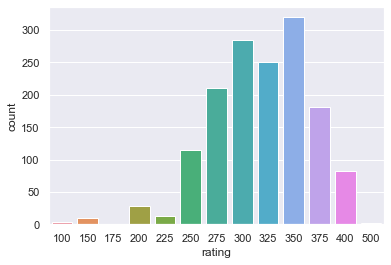

In [68]:
snc.countplot(x = 'rating', data=data)

In [69]:
def rating_to_stars(rating):
    
    rating = int(rating)
    
    if (rating == 0.0 ):
        return 0.0
    elif (rating > 0 ) and (rating <= 199 ):
        return 1.0
    elif (rating >= 200 ) and (rating <= 299 ):
        return 2.0
    elif (rating >= 300 ) and (rating <= 399 ):
        return 3.0
    elif (rating >= 400 ) and (rating <= 499 ):
        return 4.0
    elif (rating >= 500 ):
        return 5.0
    else:
        return 0.0

In [70]:
data['rating'] = data['rating'].apply(rating_to_stars)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4668/2974779079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].apply(rating_to_stars)


<AxesSubplot:xlabel='rating', ylabel='count'>

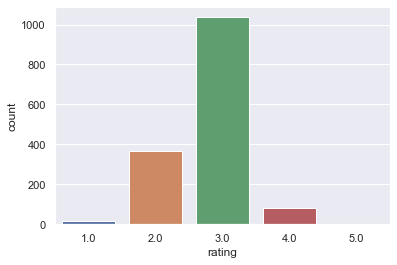

In [71]:
snc.countplot(x = 'rating', data=data)

In [72]:
X = data.drop('rating', axis = 1)
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [73]:
rfc = RandomForestClassifier(n_estimators=5000, min_weight_fraction_leaf= 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(min_weight_fraction_leaf=0, n_estimators=5000)

In [74]:
rfc_pred = rfc.predict(X_test)


In [75]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.43      0.12      0.18       104
         3.0       0.72      0.94      0.82       318
         4.0       0.00      0.00      0.00        21
         5.0       0.00      0.00      0.00         1

    accuracy                           0.69       450
   macro avg       0.23      0.21      0.20       450
weighted avg       0.61      0.69      0.62       450



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print(accuracy_score(y_test,rfc_pred)*100)

69.33333333333334
